# Penguin dataset

In [45]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats


In [46]:
# Load the data
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:

# Set Option to be max for Rows and Columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore') 

In [4]:
df.shape

(344, 7)

- we have 344 Rows and 7 columns

In [5]:
# Information about the data]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# Check unique values in each column
df.nunique()


species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [7]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [8]:
# Statistical summary of the dataset
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


- What  is flipper?

    In the context of the penguin dataset, "flipper" likely refers to the flipper length of a penguin. This is a measurement, usually in millimeters, of the length of a penguin's flipper. Different species of penguins have different average flipper lengths, so this can be a useful feature for distinguishing between species in a machine learning model or data analysis

(![parts of body.jpg](<attachment:parts of body.jpg>))
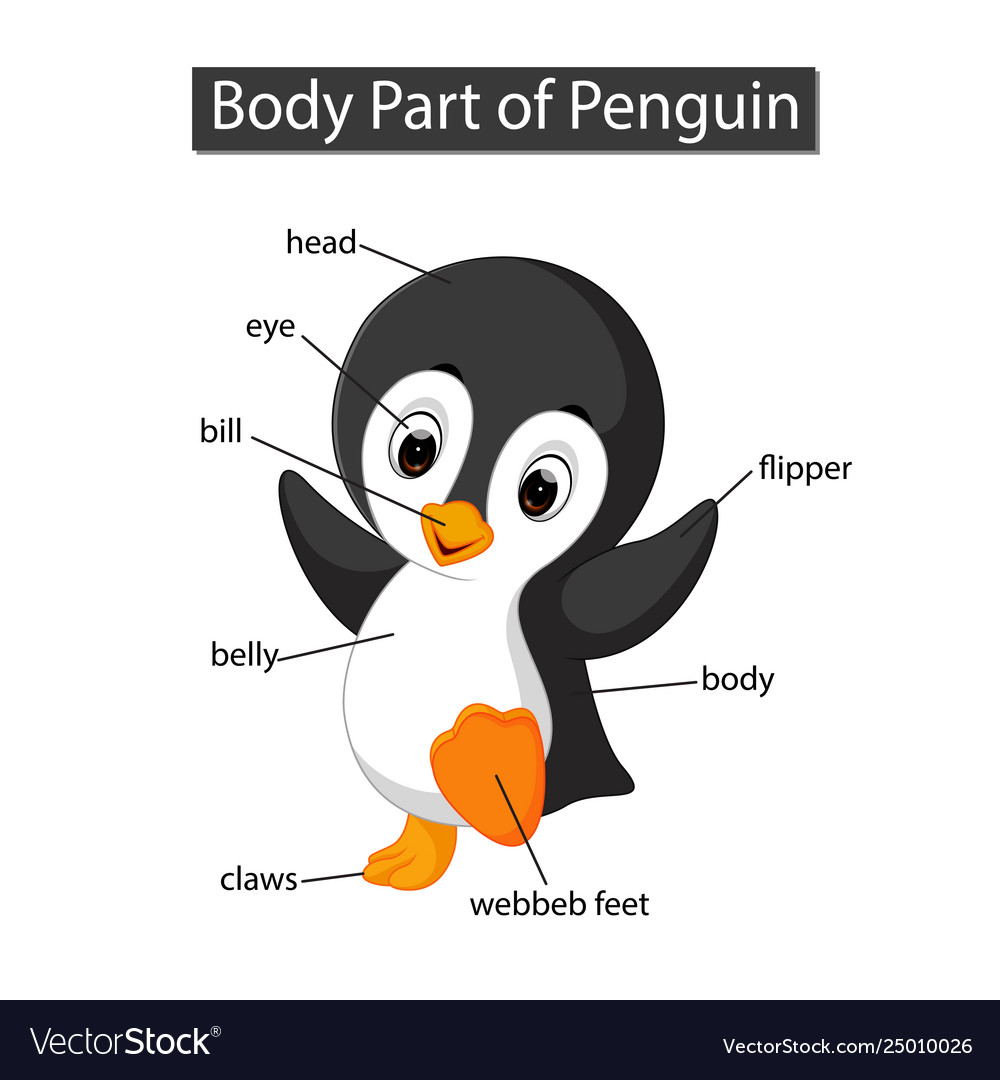

# 01.Missing values

In [48]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

In [49]:
# find missing values percentage in data
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage.sort_values(ascending=False)

sex                  3.197674
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
species              0.000000
island               0.000000
dtype: float64

In [50]:
df['sex'].isnull().sum()

11

-   Sex column is important to us so we can not drop this lets impute 

# *i).impute  null values with mode*

In [51]:
# impute missing values with mode
df["sex"] = df["sex"].fillna(df["sex"].mode()[0])
     


In [13]:
df['sex'].isnull().sum()


0

-   Here we impute values of sex

# *ii)Impute null values with mean*

In [52]:
# Impute null valus with mean
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())

- Here we impute values of (bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g') 

In [15]:
df.isnull().sum().sort_values(ascending=False)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

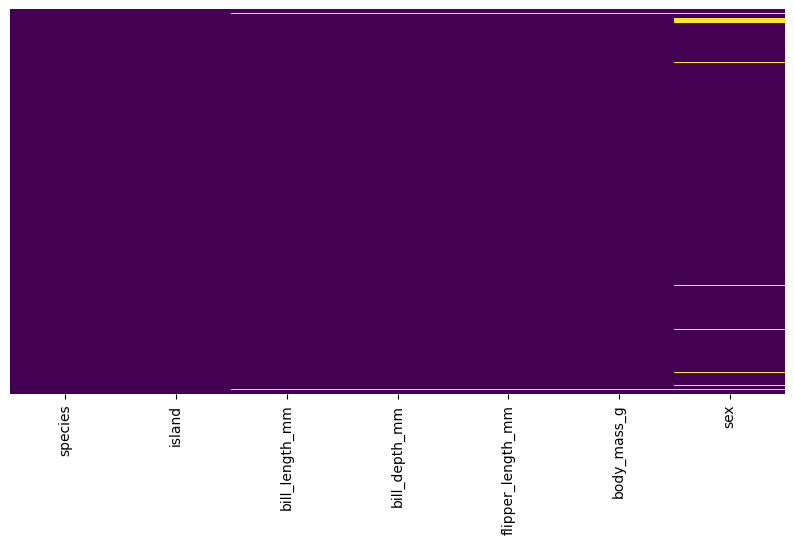

In [47]:
# ploting missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df = df.apply(lambda x: pd.to_numeric(x, errors='ignore') if x.dtype == 'object' else x.fillna(x.mean()))


- Here we cam update our data frame

In [18]:
df['sex'].isnull().sum()

0

In [19]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


-  01. Miletone have be done. impute all null values

# 02. Duplicates values

-  Lets Check duplicates values

In [20]:
# Check for duplicate values in the dataset
df.duplicated().sum()

0

In [21]:
df.duplicated().any()

False

In [22]:
# Check dulicate values column wise
df[ df.duplicated() ].head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


-    we have no duplicates values so we jump to another step

* 02. *Milestone have done*

In [23]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


- Ploting to describe 

In [24]:
# Scatter plot for bill length and bill depth
fig= px.scatter(df, x='bill_length_mm', y='bill_depth_mm', color='species',  title='Bill Length vs Bill Depth')

fig.show()


In [25]:
# Scatter plot for flipper length and body mass
fig= px.scatter(df, x='flipper_length_mm', y='body_mass_g', color='species',  title='Flipper Length vs Body Mass')
fig.show()

In [26]:
# sunburst plot for species and island
fig = px.sunburst(df, path=['species', 'island','sex'], title='Species and Island')
fig.update_layout(width=800, height=600)
fig.show()



In [27]:
# Histogram for bill length
fig=px.histogram(df, x='bill_length_mm', color='species', title='Bill Length')
fig.update_layout(bargap=0.1)
fig.show()

In [28]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [29]:
# box plot for bill length
fig=px.box(df, y='bill_length_mm',x='sex' ,color='species', title='Bill Length')
fig.show()

# 03 Outliers

In [53]:
Q1 = df["bill_depth_mm"].quantile(0.25)
Q3 = df["bill_depth_mm"].quantile(0.75)
IQR = Q3-Q1
# print(IQR)
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and print outliers
outliers = [df[(df['bill_depth_mm'] < lower_bound) | (df['bill_depth_mm'] > upper_bound)]]
print("Outliers:")
print(outliers)

Outliers:
[Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []]


In [31]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [32]:
# Create a contigency table
contigency_table = pd.crosstab(df['sex'], df['body_mass_g'])
contigency_table

body_mass_g,2700.000000,2850.000000,2900.000000,2925.000000,2975.000000,3000.000000,3050.000000,3075.000000,3100.000000,3150.000000,3175.000000,3200.000000,3250.000000,3275.000000,3300.000000,3325.000000,3350.000000,3400.000000,3425.000000,3450.000000,3475.000000,3500.000000,3525.000000,3550.000000,3575.000000,3600.000000,3625.000000,3650.000000,3675.000000,3700.000000,3725.000000,3750.000000,3775.000000,3800.000000,3825.000000,3850.000000,3875.000000,3900.000000,3950.000000,3975.000000,4000.000000,4050.000000,4075.000000,4100.000000,4150.000000,4200.000000,4201.754386,4250.000000,4275.000000,4300.000000,4350.000000,4375.000000,4400.000000,4450.000000,4475.000000,4500.000000,4550.000000,4575.000000,4600.000000,4625.000000,4650.000000,4675.000000,4700.000000,4725.000000,4750.000000,4775.000000,4800.000000,4850.000000,4875.000000,4900.000000,4925.000000,4950.000000,4975.000000,5000.000000,5050.000000,5100.000000,5150.000000,5200.000000,5250.000000,5300.000000,5350.000000,5400.000000,5450.000000,5500.000000,5550.000000,5600.000000,5650.000000,5700.000000,5750.000000,5800.000000,5850.000000,5950.000000,6000.000000,6050.000000,6300.000000
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,1,2,4,1,0,2,4,1,1,4,2,5,4,1,4,4,5,7,1,7,1,5,2,5,1,5,1,3,2,8,1,1,1,5,1,1,0,2,2,0,0,0,0,0,2,3,0,0,0,2,1,1,4,2,0,1,1,1,3,2,3,0,5,1,4,0,2,4,2,2,1,2,1,3,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Male,0,0,0,0,1,0,0,0,0,0,0,0,1,0,2,1,0,1,1,1,2,2,0,4,0,2,0,3,0,3,2,4,3,7,0,0,1,8,8,1,5,6,1,5,4,2,2,5,1,6,1,0,4,3,1,2,1,0,2,0,2,1,1,2,1,1,1,0,1,0,1,0,0,3,2,2,1,2,3,4,3,5,1,5,6,2,3,5,1,2,3,2,2,1,1


In [33]:
# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")
#print results using if else condition
# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

Chi-square statistic: 172.87182724241129
p-value: 1.341687138452347e-06
Degrees of freedom: 94
Expected:
 [[0.47965116 0.95930233 1.91860465 0.47965116 0.47965116 0.95930233
  1.91860465 0.47965116 0.47965116 1.91860465 0.95930233 2.39825581
  2.39825581 0.47965116 2.87790698 2.39825581 2.39825581 3.8372093
  0.95930233 3.8372093  1.43895349 3.35755814 0.95930233 4.31686047
  0.47965116 3.35755814 0.47965116 2.87790698 0.95930233 5.27616279
  1.43895349 2.39825581 1.91860465 5.75581395 0.47965116 0.47965116
  0.47965116 4.79651163 4.79651163 0.47965116 2.39825581 2.87790698
  0.47965116 2.39825581 2.87790698 2.39825581 0.95930233 2.39825581
  0.47965116 3.8372093  0.95930233 0.47965116 3.8372093  2.39825581
  0.47965116 1.43895349 0.95930233 0.47965116 2.39825581 0.95930233
  2.39825581 0.47965116 2.87790698 1.43895349 2.39825581 0.47965116
  1.43895349 1.91860465 1.43895349 0.95930233 0.95930233 0.95930233
  0.47965116 2.87790698 1.43895349 1.43895349 0.95930233 1.91860465
  1.4389534

As the p_value in this test is `P-value: 7.829491087019631e-07` which is far less than `0.05`, we reject the null hypothesis.

# Normal distrubution test

<Axes: xlabel='body_mass_g', ylabel='Count'>

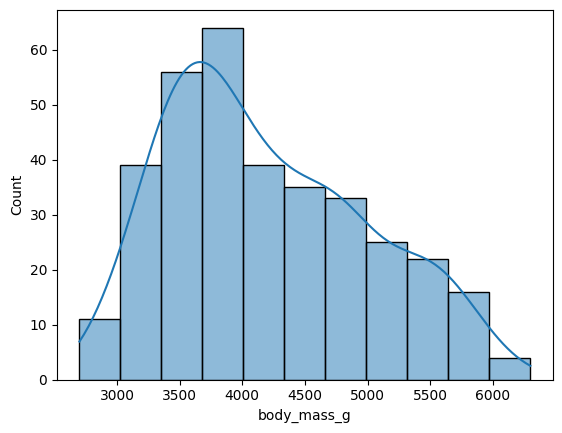

In [34]:
# graphical Method
sns.histplot(data=df, x='body_mass_g', kde=True)

# shapiro wilk Test on Normal Distribution Gaussian Distribution
# Null Hypothesis: The data is normally distributed.
# Alternative Hypothesis: Data is not normally distributed.

In [35]:
# shapiro Wilk Test 
statistic, p = stats.shapiro(df['body_mass_g'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 4.3151491269100006e-08, Sample does not look Gaussian/Normally Distributed (reject H0)


In [36]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


<Axes: xlabel='bill_length_mm', ylabel='Count'>

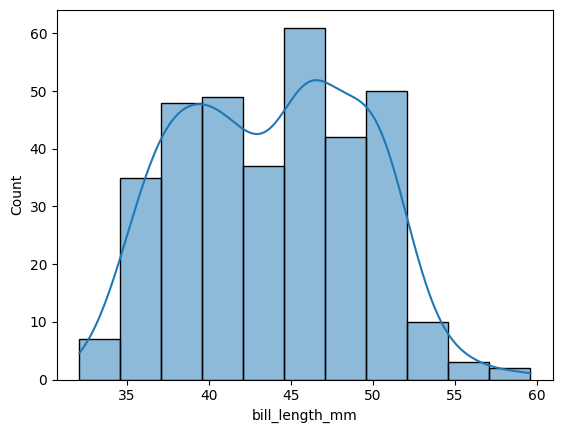

In [54]:
sns.histplot(data=df, x='bill_length_mm', kde=True)    

In [55]:
# shapiro Wilk Test 
statistic, p = stats.shapiro(df['bill_length_mm'])

# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample does not look Gaussian/Normally Distributed (reject H0)')

p-value: 1.527906169940252e-05, Sample does not look Gaussian/Normally Distributed (reject H0)


# T-Test

1. Sample T-test

In [39]:
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:

# Remove missing values
df = df.dropna(subset=['age'])

# Known population mean
mu = 30

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['age'], mu)

# Print results
print('t-statistic:', t_statistic)
print('p-value:', p_value)
# print the results using if else
if p > 0.05:
    print(f'p-value: {p}, Sample mean is equal to population mean (fail to reject H0)')
else:
    print(f'p-value: {p}, Sample mean is not equal to population mean (reject H0)')

t-statistic: -0.5534583115970276
p-value: 0.5801231230388639
p-value: 1.527906169940252e-05, Sample mean is not equal to population mean (reject H0)


# 2.Sample Independent

In [41]:

# Remove missing values
df = df.dropna(subset=['age'])

# Define the two independent groups
group1 = df[df['sex'] == 'male']['age']
group2 = df[df['sex'] == 'female']['age']

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

if p > 0.05:
    print(f'p-value: {p}, group1 mean is equal to group2 mean (fail to reject H0)')
else:
    print(f'p-value: {p}, group1 mean is not equal to group2 mean (reject H0)')

t-statistic: 2.499206354920835
p-value: 0.012671296797013709
p-value: 1.527906169940252e-05, group1 mean is not equal to group2 mean (reject H0)


# Kolmogorov-smirnov test

In [42]:
# perform kolmogorov smirnov test on titanice dataset
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import norm

# Extract the 'Age' column from the DataFrame
age = df['age']

# Perform the Kolmogorov-Smirnov test 
ks_test, p_value = kstest(age, cdf='norm', args=(age.mean(), age.std()))

# Print the test statistic and the p-value
print('KS-test statistic:', ks_test)
print('p-value:', p_value)
 
P = 0.05
# print the results using if else
if p_value > P :
    print(f'p-value: {P}, Sample looks Gaussian/Normally Distributed (fail to reject H0)')
else:
    print(f'p-value: {P}, Sample does not look Gaussian/Normally Distributed (reject H0)')    

KS-test statistic: 0.06456656793494475
p-value: 0.004958146899084227
p-value: 0.05, Sample does not look Gaussian/Normally Distributed (reject H0)


In [56]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


# Feature Encoding

Label encoding
- Ordinal encoding
- One-hot encoding
- Binary encoding

In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df['sex'].value_counts()

sex
Male      179
Female    165
Name: count, dtype: int64

In [59]:
# lets encode the sex with label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['encoded_time'] = le.fit_transform(df['sex'])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,encoded_time
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,0


In [62]:
df['encoded_time'].value_counts()

encoded_time
1    179
0    165
Name: count, dtype: int64

In [65]:
# ordinal encoding the island column using specific order
df['encoded_island'] = df['island'].map({'Biscoe':0, 'Dream':1, 'Torgersen':2})
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,encoded_time,encoded_island
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,2


In [ ]:
# one hot encoding the island column
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
one.fit_transform(df[['sex']]).toarray()

In [70]:
# example of one hot encoding
penguins = sns.load_dataset('penguins')

onehot_encoder = OneHotEncoder(sparse=False)
island_onehot = onehot_encoder.fit_transform(penguins[['island']])
island_onehot_df = pd.DataFrame(island_onehot, columns=onehot_encoder.get_feature_names_out(['island']))
penguin = pd.concat([penguins.reset_index(drop=True), island_onehot_df.reset_index(drop=True)], axis=1)
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0,0.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0,0.0,1.0
